In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Kenya World Bank Data (2013-2022).xlsx')
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   \
0                                                NaN                                        
1                  Kenya World Bank Data (2013-2022)                                        
2                                                NaN                                        
3                                        Series Name                                        
4  Adolescent fertility rate (births per 1,000 wo...                                        

    Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3  Series Code       2013       2014       2015       2016       2017   
4  SP.ADO.TFRT     90.858     86.955     81.426     76.813     72.354   

  Unnamed: 7 Unnamed: 8 Unnamed: 9 Unnamed: 10 Unnamed: 11  
0        NaN        NaN        NaN         NaN         NaN  
1        NaN        NaN        NaN         NaN         NaN  
2        NaN        NaN        NaN         NaN         NaN  
3       2018       2019       2020        2021        2022  
4     71.298     69.578     64.939      64.185          ..

In [3]:
df = df.transpose() # Transpose the dataframe ie rows to columns and columns to rows
df.head()

0   \
Source: https://databank.worldbank.org/source/w...  NaN   
Unnamed: 1                                          NaN   
Unnamed: 2                                          NaN   
Unnamed: 3                                          NaN   
Unnamed: 4                                          NaN   

                                                                                   1   \
Source: https://databank.worldbank.org/source/w...  Kenya World Bank Data (2013-2022)   
Unnamed: 1                                                                        NaN   
Unnamed: 2                                                                        NaN   
Unnamed: 3                                                                        NaN   
Unnamed: 4                                                                        NaN   

                                                     2            3   \
Source: https://databank.worldbank.org/source/w...  NaN  Series Name   
Unnamed: 1                                          NaN  Series Code   
Unnamed: 2                                          NaN         2013   
Unnamed: 3                                          NaN         2014   
Unnamed: 4                                          NaN         2015   

                                                                                                   4   \
Source: https://databank.worldbank.org/source/w...  Adolescent fertility rate (births per 1,000 wo...   
Unnamed: 1                                                                                SP.ADO.TFRT   
Unnamed: 2                                                                                     90.858   
Unnamed: 3                                                                                     86.955   
Unnamed: 4                                                                                     81.426   

                                                                                                   5   \
Source: https://databank.worldbank.org/source/w...  Agriculture, forestry, and fishing, value adde...   
Unnamed: 1                                                                             NV.AGR.TOTL.ZS   
Unnamed: 2                                                                                  18.616552   
Unnamed: 3                                                                                  18.347839   
Unnamed: 4                                                                                  19.469615   

                                                                                                   6   \
Source: https://databank.worldbank.org/source/w...  Annual freshwater withdrawals, total (% of int...   
Unnamed: 1                                                                             ER.H2O.FWTL.ZS   
Unnamed: 2                                                                                  15.551691   
Unnamed: 3                                                                                  15.553623   
Unnamed: 4                                                                                  15.555556   

                                                                                                   7   \
Source: https://databank.worldbank.org/source/w...  Births attended by skilled health staff (% of ...   
Unnamed: 1                                                                             SH.STA.BRTC.ZS   
Unnamed: 2                                                                                         ..   
Unnamed: 3                                                                                       61.8   
Unnamed: 4                                                                                         ..   

                                                                                        8   \
Source: https://databank.worldbank.org/source/w...  CO2 emissions (metric tons per capita)   
Unnamed: 1        

In [4]:
df.columns = df.iloc[0] # Set the first row as the column names
df = df[1:] # Remove the first row
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   NaN  \
Unnamed: 1                                                                               NaN   
Unnamed: 2                                                                               NaN   
Unnamed: 3                                                                               NaN   
Unnamed: 4                                                                               NaN   
Unnamed: 5                                                                               NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Kenya World Bank Data (2013-2022)  \
Unnamed: 1                                                                                                            NaN   
Unnamed: 2                                                                                                            NaN   
Unnamed: 3                                                                                                            NaN   
Unnamed: 4                                                                                                            NaN   
Unnamed: 5                                                                                                            NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   NaN  \
Unnamed: 1                                                                               NaN   
Unnamed: 2                                                                               NaN   
Unnamed: 3                                                                               NaN   
Unnamed: 4                                                                               NaN   
Unnamed: 5                                                                               NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   Series Name  \
Unnamed: 1                                                                               Series Code   
Unnamed: 2                                                                                      2013   
Unnamed: 3                                                                                      2014   
Unnamed: 4                                                                                      2015   
Unnamed: 5                                                                                      2016   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Unnamed: 1                                                                                                                     SP.ADO.TFRT              
Unnamed: 2                                                                                                                          90.858              
Unnamed: 3                                                                                                                          86.955              
Unnamed: 4                                                                                                                          81.426              
Unnamed: 5                                                                                                                          76.813              

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Agriculture, forestry, and fishing, value added (% of GDP)  \
Unnamed: 1                                                                                                                  NV.AGR.TOTL.ZS           
Unnamed: 2                                                                                                                       18.616552           
Unnamed: 3                                                                                           

# Exploratory Data Analysis

In [5]:
# Remove all NaN values
df = df.dropna(axis=0, how='all')
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   NaN  \
Unnamed: 1                                                                               NaN   
Unnamed: 2                                                                               NaN   
Unnamed: 3                                                                               NaN   
Unnamed: 4                                                                               NaN   
Unnamed: 5                                                                               NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Kenya World Bank Data (2013-2022)  \
Unnamed: 1                                                                                                            NaN   
Unnamed: 2                                                                                                            NaN   
Unnamed: 3                                                                                                            NaN   
Unnamed: 4                                                                                                            NaN   
Unnamed: 5                                                                                                            NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   NaN  \
Unnamed: 1                                                                               NaN   
Unnamed: 2                                                                               NaN   
Unnamed: 3                                                                               NaN   
Unnamed: 4                                                                               NaN   
Unnamed: 5                                                                               NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   Series Name  \
Unnamed: 1                                                                               Series Code   
Unnamed: 2                                                                                      2013   
Unnamed: 3                                                                                      2014   
Unnamed: 4                                                                                      2015   
Unnamed: 5                                                                                      2016   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Unnamed: 1                                                                                                                     SP.ADO.TFRT              
Unnamed: 2                                                                                                                          90.858              
Unnamed: 3                                                                                                                          86.955              
Unnamed: 4                                                                                                                          81.426              
Unnamed: 5                                                                                                                          76.813              

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Agriculture, forestry, and fishing, value added (% of GDP)  \
Unnamed: 1                                                                                                                  NV.AGR.TOTL.ZS           
Unnamed: 2                                                                                                                       18.616552           
Unnamed: 3                                                                                           

In [6]:
pd.set_option('display.max_columns', None) # Display all columns
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   NaN  \
Unnamed: 1                                                                               NaN   
Unnamed: 2                                                                               NaN   
Unnamed: 3                                                                               NaN   
Unnamed: 4                                                                               NaN   
Unnamed: 5                                                                               NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Kenya World Bank Data (2013-2022)  \
Unnamed: 1                                                                                                            NaN   
Unnamed: 2                                                                                                            NaN   
Unnamed: 3                                                                                                            NaN   
Unnamed: 4                                                                                                            NaN   
Unnamed: 5                                                                                                            NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   NaN  \
Unnamed: 1                                                                               NaN   
Unnamed: 2                                                                               NaN   
Unnamed: 3                                                                               NaN   
Unnamed: 4                                                                               NaN   
Unnamed: 5                                                                               NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   Series Name  \
Unnamed: 1                                                                               Series Code   
Unnamed: 2                                                                                      2013   
Unnamed: 3                                                                                      2014   
Unnamed: 4                                                                                      2015   
Unnamed: 5                                                                                      2016   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Unnamed: 1                                                                                                                     SP.ADO.TFRT              
Unnamed: 2                                                                                                                          90.858              
Unnamed: 3                                                                                                                          86.955              
Unnamed: 4                                                                                                                          81.426              
Unnamed: 5                                                                                                                          76.813              

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Agriculture, forestry, and fishing, value added (% of GDP)  \
Unnamed: 1                                                                                                                  NV.AGR.TOTL.ZS           
Unnamed: 2                                                                                                                       18.616552           
Unnamed: 3                                                                                           

In [7]:
df = df.drop(df.index[0]) # drop the first row at index 0
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   NaN  \
Unnamed: 2                                                                               NaN   
Unnamed: 3                                                                               NaN   
Unnamed: 4                                                                               NaN   
Unnamed: 5                                                                               NaN   
Unnamed: 6                                                                               NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Kenya World Bank Data (2013-2022)  \
Unnamed: 2                                                                                                            NaN   
Unnamed: 3                                                                                                            NaN   
Unnamed: 4                                                                                                            NaN   
Unnamed: 5                                                                                                            NaN   
Unnamed: 6                                                                                                            NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   NaN  \
Unnamed: 2                                                                               NaN   
Unnamed: 3                                                                               NaN   
Unnamed: 4                                                                               NaN   
Unnamed: 5                                                                               NaN   
Unnamed: 6                                                                               NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Series Name  \
Unnamed: 2                                                                                     2013   
Unnamed: 3                                                                                     2014   
Unnamed: 4                                                                                     2015   
Unnamed: 5                                                                                     2016   
Unnamed: 6                                                                                     2017   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Unnamed: 2                                                                                                                          90.858              
Unnamed: 3                                                                                                                          86.955              
Unnamed: 4                                                                                                                          81.426              
Unnamed: 5                                                                                                                          76.813              
Unnamed: 6                                                                                                                          72.354              

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Agriculture, forestry, and fishing, value added (% of GDP)  \
Unnamed: 2                                                                                                                       18.616552           
Unnamed: 3                                                                                                                       18.347839           
Unnamed: 4                                                                                                 

In [8]:
df = df.dropna(axis=0, how='all')
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   NaN  \
Unnamed: 2                                                                               NaN   
Unnamed: 3                                                                               NaN   
Unnamed: 4                                                                               NaN   
Unnamed: 5                                                                               NaN   
Unnamed: 6                                                                               NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Kenya World Bank Data (2013-2022)  \
Unnamed: 2                                                                                                            NaN   
Unnamed: 3                                                                                                            NaN   
Unnamed: 4                                                                                                            NaN   
Unnamed: 5                                                                                                            NaN   
Unnamed: 6                                                                                                            NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   NaN  \
Unnamed: 2                                                                               NaN   
Unnamed: 3                                                                               NaN   
Unnamed: 4                                                                               NaN   
Unnamed: 5                                                                               NaN   
Unnamed: 6                                                                               NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Series Name  \
Unnamed: 2                                                                                     2013   
Unnamed: 3                                                                                     2014   
Unnamed: 4                                                                                     2015   
Unnamed: 5                                                                                     2016   
Unnamed: 6                                                                                     2017   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Unnamed: 2                                                                                                                          90.858              
Unnamed: 3                                                                                                                          86.955              
Unnamed: 4                                                                                                                          81.426              
Unnamed: 5                                                                                                                          76.813              
Unnamed: 6                                                                                                                          72.354              

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Agriculture, forestry, and fishing, value added (% of GDP)  \
Unnamed: 2                                                                                                                       18.616552           
Unnamed: 3                                                                                                                       18.347839           
Unnamed: 4                                                                                                 

In [9]:
# Drop the first column
df = df.drop(df.columns[0], axis=1)
df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Kenya World Bank Data (2013-2022)  \
Unnamed: 2                                                                                                            NaN   
Unnamed: 3                                                                                                            NaN   
Unnamed: 4                                                                                                            NaN   
Unnamed: 5                                                                                                            NaN   
Unnamed: 6                                                                                                            NaN   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Series Name  \
Unnamed: 2                                                                                     2013   
Unnamed: 3                                                                                     2014   
Unnamed: 4                                                                                     2015   
Unnamed: 5                                                                                     2016   
Unnamed: 6                                                                                     2017   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Unnamed: 2                                                                                                                          90.858              
Unnamed: 3                                                                                                                          86.955              
Unnamed: 4                                                                                                                          81.426              
Unnamed: 5                                                                                                                          76.813              
Unnamed: 6                                                                                                                          72.354              

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Agriculture, forestry, and fishing, value added (% of GDP)  \
Unnamed: 2                                                                                                                       18.616552           
Unnamed: 3                                                                                                                       18.347839           
Unnamed: 4                                                                                                                       19.469615           
Unnamed: 5                                                                                                                       20.034516           
Unnamed: 6                                                                                                                       20.893637           

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#  Annual freshwater withdrawals, total (% of internal resources)  \
Unnamed: 2                                                                                                                       15.551691               
Unnamed: 3                                                                                                                       15.553623               
Unnamed: 4                                                                                                                       15.555556               
Unnamed: 5                                                                                                                       19.478261               
Unnamed: 6                              

In [11]:
# Rename columns
df = df.rename(columns={'Series Name': 'Year'})
df = df.replace('..', 0.0)

df = df.drop(df.columns[0], axis=1)

df.head()

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   Year  \
Unnamed: 2                                                                               2013   
Unnamed: 3                                                                               2014   
Unnamed: 4                                                                               2015   
Unnamed: 5                                                                               2016   
Unnamed: 6                                                                               2017   

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   Adolescent fertility rate (births per 1,000 women ages 15-19)  \
Unnamed: 2                                                                                                                          90.858               
Unnamed: 3                                                                                                                          86.955               
Unnamed: 4                                                                                                                          81.426               
Unnamed: 5                                                                                                                          76.813               
Unnamed: 6                                                                                                                          72.354               

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   Agriculture, forestry, and fishing, value added (% of GDP)  \
Unnamed: 2                                                                                                                       18.616552            
Unnamed: 3                                                                                                                       18.347839            
Unnamed: 4                                                                                                                       19.469615            
Unnamed: 5                                                                                                                       20.034516            
Unnamed: 6                                                                                                                       20.893637            

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   Annual freshwater withdrawals, total (% of internal resources)  \
Unnamed: 2                                                                                                                       15.551691                
Unnamed: 3                                                                                                                       15.553623                
Unnamed: 4                                                                                                                       15.555556                
Unnamed: 5                                                                                                                       19.478261                
Unnamed: 6                                                                                                                       19.478261                

Source: https://databank.worldbank.org/source/world-development-indicators/preview/on#   Births attended by skilled health staff (% of total)  \
Unnamed: 2                                                                                                                             0.0      
Unnamed: 3                                                                                                                            61.8      
Unnamed: 4                                                                                                                             0.0      
Unnamed: 5                                                                

In [12]:
df.columns.name = None # Remove the column name
df.columns
print("The dataframe has {} rows and {} columns".format(df.shape[0], df.shape[1]))
print("The dataframe has {} missing values".format(df.isnull().sum().sum()))
print('The dataframe has {} duplicated values'.format(df.duplicated().sum()))

Index(['Year', 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annual freshwater withdrawals, total (% of internal resources)',
       'Births attended by skilled health staff (% of total)',
       'CO2 emissions (metric tons per capita)',
       'Contraceptive prevalence, any method (% of married women ages 15-49)',
       'Domestic credit provided by financial sector (% of GDP)',
       'Electric power consumption (kWh per capita)',
       'Energy use (kg of oil equivalent per capita)',
       'Exports of goods and services (% of GDP)',
       'External debt stocks, total (DOD, current US$)',
       'Fertility rate, total (births per woman)',
       'Foreign direct investment, net inflows (BoP, current US$)',
       'Forest area (sq. km)', 'GDP (current US$)', 'GDP growth (annual %)',
       'GNI per capita, Atlas method (current US$)',
       'GNI per capita, PPP (current international $)',

In [14]:
df.reset_index(drop=True, inplace=True) # remove the index column

In [15]:
df.to_csv('Kenya World Bank Data (2013-2022).csv', index=False)

## Visualizations

In [16]:
df.head()

Year  Adolescent fertility rate (births per 1,000 women ages 15-19)  \
0  2013                                             90.858               
1  2014                                             86.955               
2  2015                                             81.426               
3  2016                                             76.813               
4  2017                                             72.354               

   Agriculture, forestry, and fishing, value added (% of GDP)  \
0                                          18.616552            
1                                          18.347839            
2                                          19.469615            
3                                          20.034516            
4                                          20.893637            

   Annual freshwater withdrawals, total (% of internal resources)  \
0                                          15.551691                
1                                          15.553623                
2                                          15.555556                
3                                          19.478261                
4                                          19.478261                

   Births attended by skilled health staff (% of total)  \
0                                                0.0      
1                                               61.8      
2                                                0.0      
3                                               70.2      
4                                                0.0      

   CO2 emissions (metric tons per capita)  \
0                                0.321209   
1                                0.364375   
2                                0.386120   
3                                0.403178   
4                                0.410582   

   Contraceptive prevalence, any method (% of married women ages 15-49)  \
0                                                0.0                      
1                                               58.0                      
2                                               64.1                      
3                                               61.2                      
4                                               60.0                      

   Domestic credit provided by financial sector (% of GDP)  \
0                                                0.0         
1                                                0.0         
2                                                0.0         
3                                                0.0         
4                                                0.0         

   Electric power consumption (kWh per capita)  \
0                                   163.599299   
1                                   167.438099   
2                                     0.000000   
3                                     0.000000   
4                                     0.000000   

   Energy use (kg of oil equivalent per capita)  \
0                                    476.249235   
1                                    515.581682   
2                                      0.000000   
3                                      0.000000   
4                                      0.000000   

   Exports of goods and services (% of GDP)  \
0                                 17.792181   
1                                 16.472804   
2                                 15.128734   
3                                 13.249745   
4                                 12.736660   

   External debt stocks, total (DOD, current US$)  \
0                                    1.377550e+10   
1                                    1.691174e+10   
2                                    1.978376e+10   
3                                    2.105767e+10   
4                                    2.695135e+10   

   Fertility rate, total (births per woman)  \
0                                     3.952  

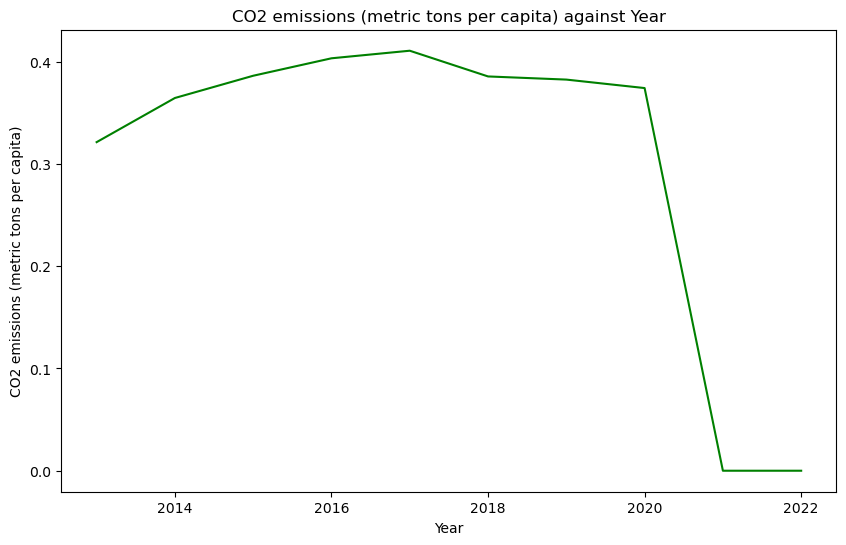

In [17]:
# CO2 emissions (metric tons per capita) against Year
#df['CO2 emissions (metric tons per capita)'] = df['CO2 emissions (metric tons per capita)'].astype(float)
#df['Year'] = df['Year'].astype(int)

plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['CO2 emissions (metric tons per capita)'], color='green')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('CO2 emissions (metric tons per capita) against Year')
plt.show();

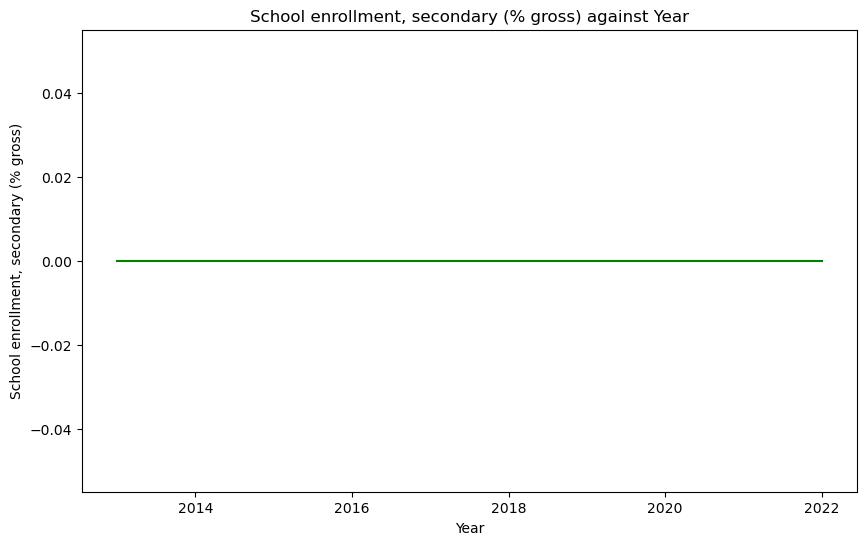

In [18]:
# School enrollment, secondary (% gross) against Year
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['School enrollment, secondary (% gross)'], color='green')
plt.xlabel('Year')
plt.ylabel('School enrollment, secondary (% gross)')
plt.title('School enrollment, secondary (% gross) against Year')
plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


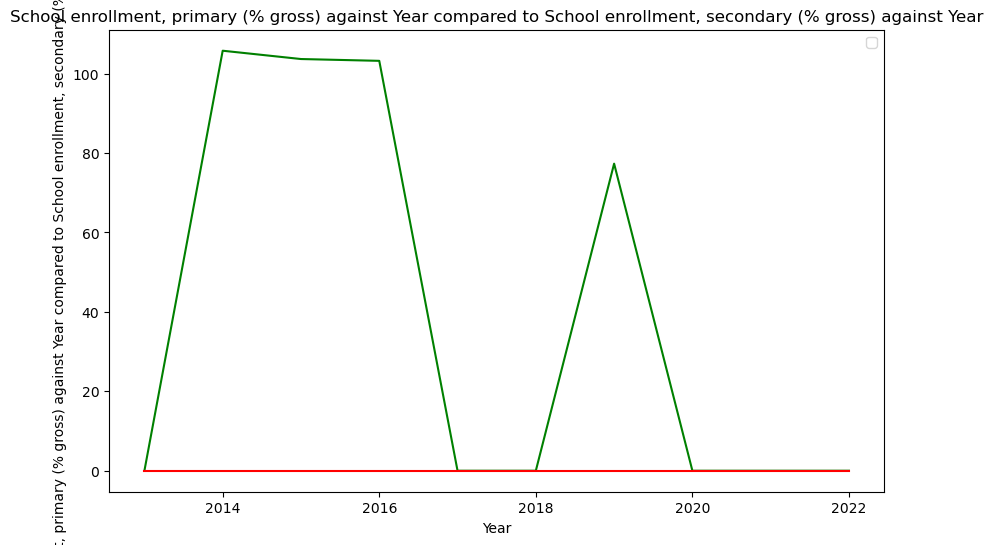

In [19]:
# School enrollment, primary (% gross) against Year compared to School enrollment, secondary (% gross) against Year
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['School enrollment, primary (% gross)'], color='green')
plt.plot(df['Year'], df['School enrollment, secondary (% gross)'], color='red')
plt.xlabel('Year')
plt.ylabel('School enrollment, primary (% gross) against Year compared to School enrollment, secondary (% gross) against Year')
plt.title('School enrollment, primary (% gross) against Year compared to School enrollment, secondary (% gross) against Year')
plt.legend()
plt.show();

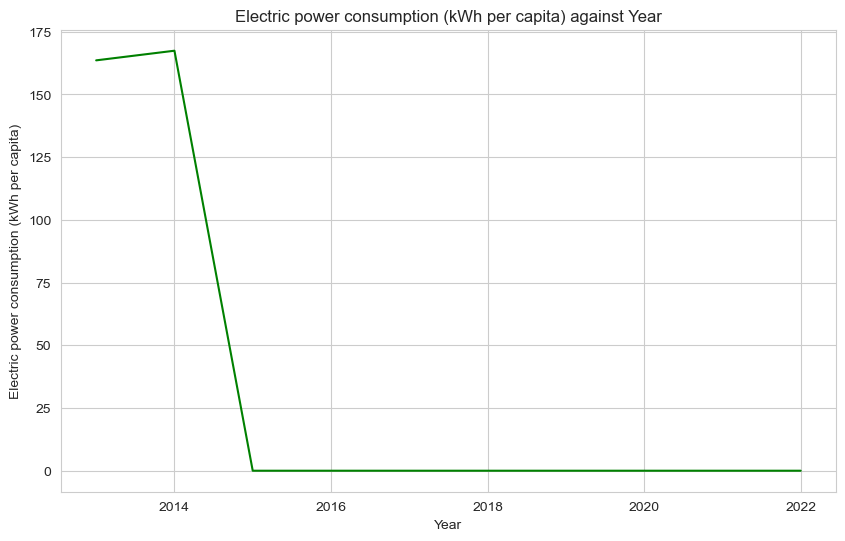

In [20]:
# Electric power consumption (kWh per capita) against Year
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Electric power consumption (kWh per capita)'], color='green')
plt.xlabel('Year')
plt.ylabel('Electric power consumption (kWh per capita)')
plt.title('Electric power consumption (kWh per capita) against Year')
plt.show();